In [1]:
import pandas as pd                                                      #FOR NUMPY
import numpy as np                                                       #FOR PANDAS
import matplotlib.pyplot as plt                                          #FOR PLOTTING
import statistics as stat                                                #FOR STSTISTICS (MEAN, MODE AND MEDIANS) IF REQUIRED
import seaborn as sns                                                    #FOR PLOTTING
from sklearn.preprocessing import MinMaxScaler                           #FOR MIN-MAX SCALEING
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = pd.read_excel('/content/iris (1).xls')

In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Classification'].nunique()

3

In [8]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [12]:
data.SL.skew()

0.3068227108046868

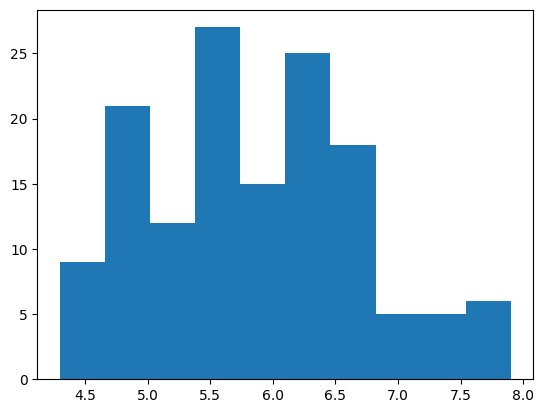

In [13]:
plt.hist(data['SL'])                            #FILL NULLVALUES WITH MEDIAN METHOD SINCE HIGHLY SKEWED
plt.show()

In [14]:
data.SW.skew()

0.37781843718771746

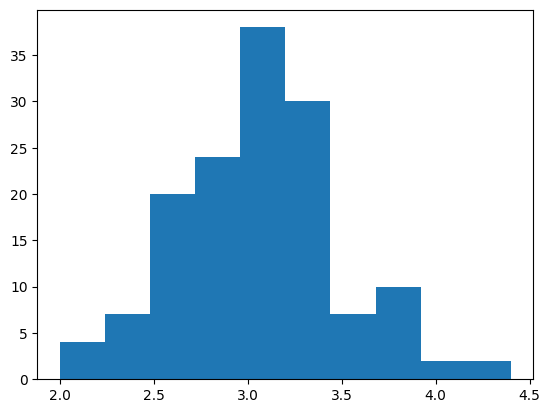

In [15]:
plt.hist(data['SW'])                          #FILL NULLVALUES WITH MEDIAN METHOD SINCE HIGHLY SKEWED
plt.show()

In [16]:
data.PL.skew()

-0.2689053923783847

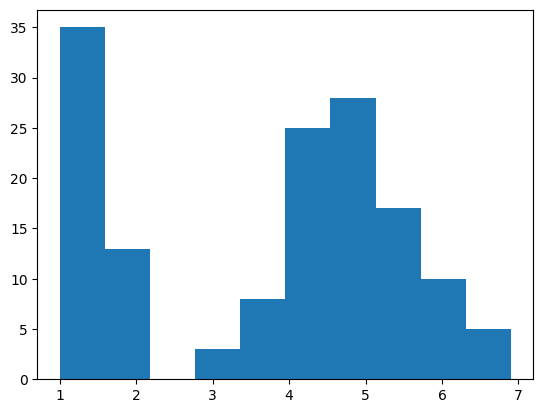

In [17]:
plt.hist(data['PL'])                     #FILL NULLVALUES WITH MEDIAN METHOD SINCE HIGHLY SKEWED
plt.show()


In [18]:
#FILLING THE NULL VALUES OF 'AGE' WITH Median VALUE
data['SL'].fillna(data['SL'].median(), inplace=True)
data['SW'].fillna(data['SW'].median(), inplace=True)
data['PL'].fillna(data['PL'].median(), inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [21]:
data.SL.skew()

0.3237869989034533

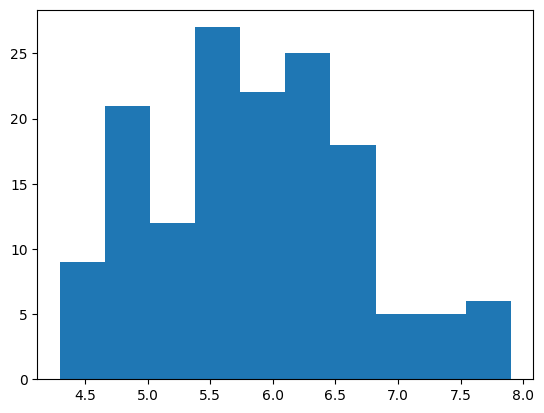

In [22]:
plt.hist(data['SL'])
plt.show()



In [23]:
data.SW.skew()

0.3992861923982765

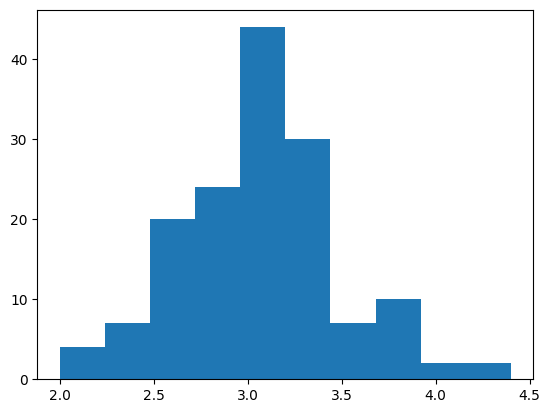

In [24]:
plt.hist(data['SW'])                          #FILL NULLVALUES WITH MEDIAN METHOD SINCE HIGHLY SKEWED
plt.show()


In [25]:
data.PL.skew()

-0.3125678285137702

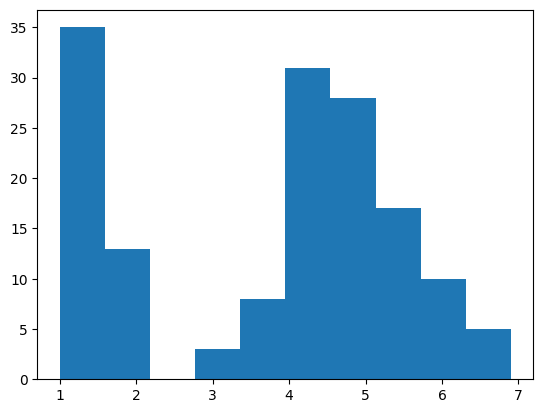

In [26]:
plt.hist(data['PL'])                          #FILL NULLVALUES WITH MEDIAN METHOD SINCE HIGHLY SKEWED
plt.show()


In [27]:
data.PW.skew()

-0.10499656214412734

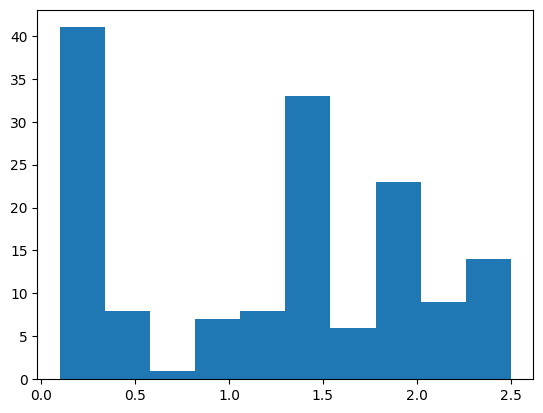

In [28]:
plt.hist(data['PW'])                          #FILL NULLVALUES WITH MEDIAN METHOD SINCE HIGHLY SKEWED
plt.show()

Check and handle outliers in all 4 columns in the dataset

In [29]:
new_columns = ['SL','SW','PL','PW']

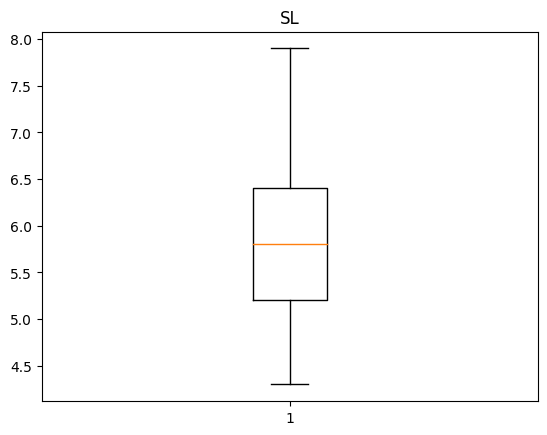

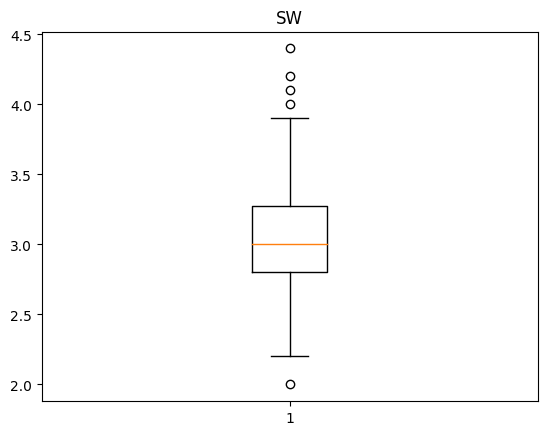

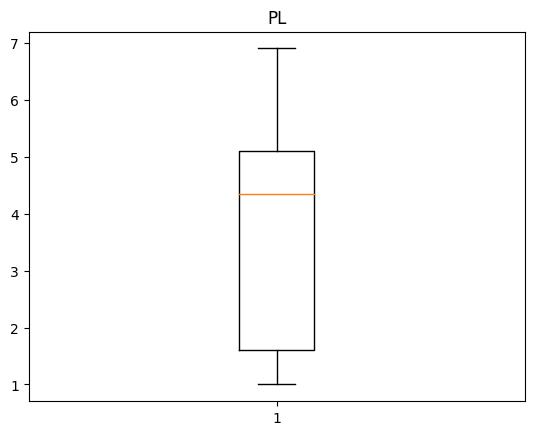

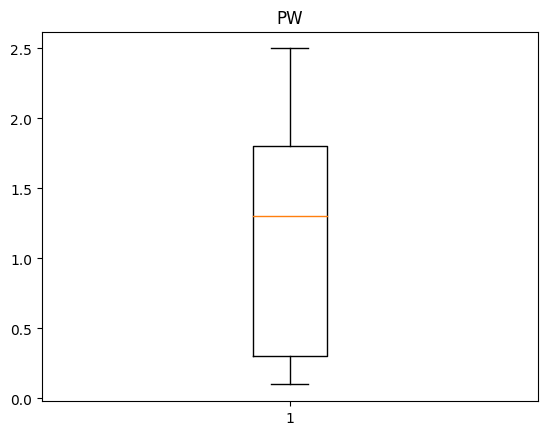

In [30]:
for i in new_columns:
  plt.figure(i)
  plt.boxplot(data[i])
  plt.title(i);

In [31]:
for j in ['SL','SW','PL','PW']:
    Q1=np.percentile(data[j],25,method='midpoint')
    Q2=np.percentile(data[j],50,method='midpoint')
    Q3=np.percentile(data[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in data[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    data[j]=data[j].clip(lower=low_lim,upper=up_lim)


In [32]:
new_columns2 = ['SL','SW','PL','PW']

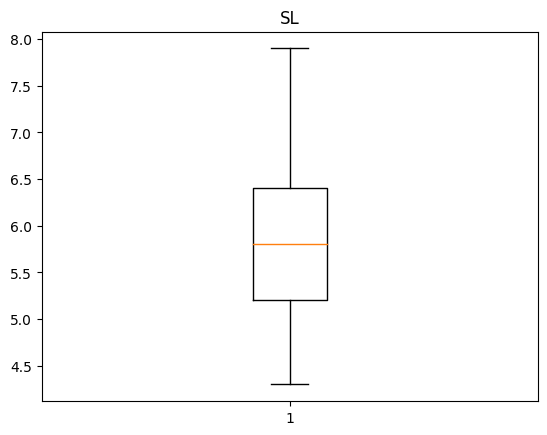

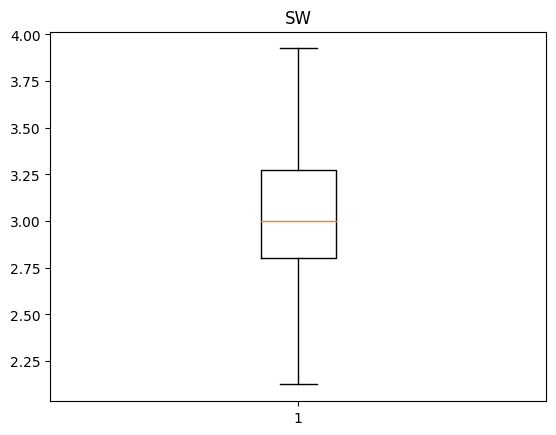

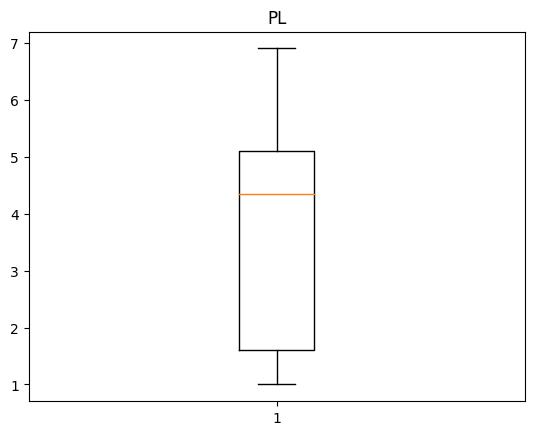

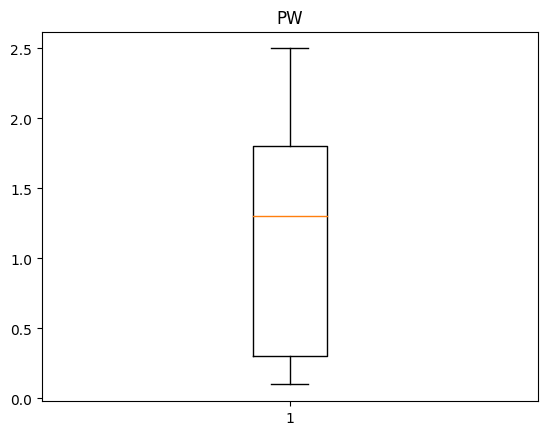

In [33]:
for z in new_columns2:
  plt.figure(z)
  plt.boxplot(data[z])
  plt.title(z);

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


LABEL ENCODING FOR THE COLUMN Classification

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
data['Classification'] = le.fit_transform(data['Classification'])

In [38]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


Scaling:- Standard Scaling

In [40]:
X = data[['SL','SW','PL','PW']]

In [41]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [44]:
X_sc.describe()


NameError: name 'X_sc' is not defined

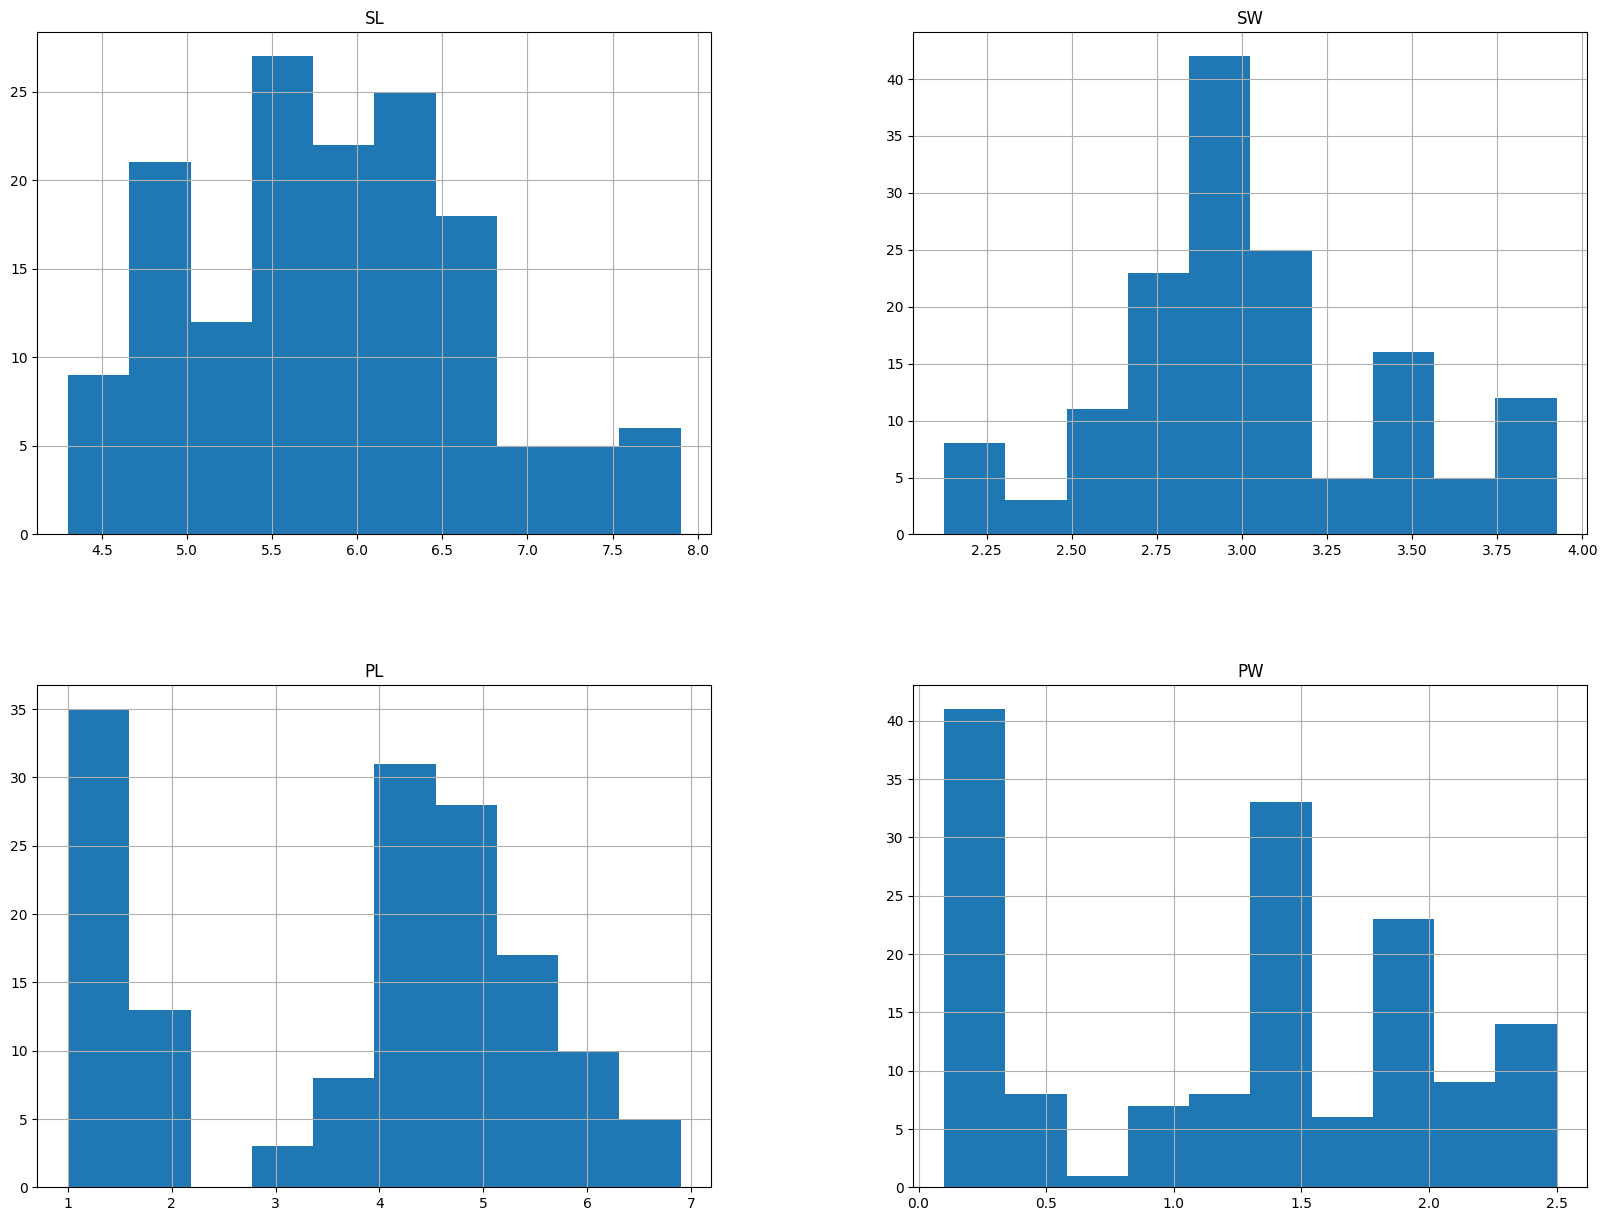

In [45]:
X.hist(figsize=(20,15))
plt.show()

In [47]:
data.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.100056,0.830554,0.800939,0.774077
SW,-0.100056,1.000000,-0.402621,-0.335121,-0.402577
PL,0.830554,-0.402621,1.000000,0.936089,0.927509
PW,0.800939,-0.335121,0.936089,1.000000,0.956464
Classification,0.774077,-0.402577,0.927509,0.956464,1.000000


<Axes: >

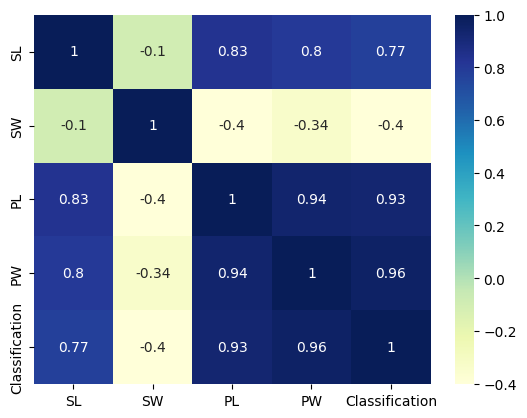

In [48]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)